## TP 1 - Aprendizado de Máquina - UFMG

# Classificação de Exoplanetas

### Índice
**1.** Introdução 

**2.** Objetivo 

**3.** Bibliotecas 

**4.** Análise dos Dados 

**5.** Normalização dos Dados 

**6.** Separação dos Dados em Treino e Teste 

**7.** Naive Bayes 

**8.** Decision Tree 

**9.** Support Vector Machines (SVM) 

**10.** k-Nearest Neighbors (k-NN) 

**11.** Random Forest 

**12.** Gradient Tree Boosting 

**13.** Comparação dos Modelos 

**14.** Conclusão 

### 1. Introdução 

O trabalho prático de Classificação de Exoplanetas consiste em realizar uma comparação entre seis métodos de classificação. Os métodos a serem utilizados serão Naive Bayes, Decision Tree, k-Nearest Neighbors, Support Vector Machines, Random Forest e Gradient Tree Boosting. A avaliação dos métodos será feita utilizando a acurácia e validação cruzada k-fold com k igual a 5.
Os métodos serão testados em um problema de classificação binária de candidatos a exoplanetas encontrados pela sonda espacial Kepler da NASA1. Um exoplaneta é um planeta fora do sistema solar. A sonda primeiro identica sinais de possíveis exoplanetas, chamados de Kepler Object of Interest (KOI). Porém nem todos os KOIs são de fato exoplanetas, alguns se tratam de falso-positivos de origens diversas. A tarefa é classificar os KOIs entre exoplanetas
confirmados e falso-positivos. 

### 2. Objetivos 


O objetivo deste trabalho prático é praticar os conceitos aprendidos na disciplina Aprendizado de Máquina e adquirir experiência no uso de alguns dos principais métodos de classicação, na avaliação de modelos, na
interpretação e apresentação de resultados de experimentos. Será utilizado e comparado
métodos de classificação baseados em princípios diferentes em um problema de classificação binária
de candidatos a exoplanetas.

### 3. Bibliotecas

A seguir temos todas as bibliotecas que serão utilizadas e importadas neste trabalho. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import feature_selection
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

### 4. Análise dos Dados

A base de dados trabalhada nesse projeto está em um arquivo csv chamado "koi_data.csv" e após importado os dados será feita a análise e tratamento dos dados. Essa etapa consiste em preparar e organizar os dados visando a qualidade final dos dados que serão analisados e evitando impactos no modelo de previsão que será gerado.  

In [ ]:
# Importando dataset
koi_data = pd.read_csv('koi_data.csv')

# Inspecionando os dados
koi_data.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [ ]:
# Imprimindo estatísticas resumidas
koi_data.describe()

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,...,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000,5202.000000
mean,37.032237,0.717106,5.607025,21340.318993,0.235205,3.415370,112.230798,0.158146,81.181413,1143.721069,...,-0.355681,-0.805629,-0.000263,0.000439,-0.049743,-0.087413,1.930251,-0.038402,-0.098738,1.920226
std,88.417985,2.628207,6.962634,66989.808550,2.586213,25.131368,3699.799318,0.241792,16.308839,775.788868,...,10.978677,14.741473,0.065707,0.077519,2.465670,2.746534,3.147553,2.465094,2.734732,3.142764
min,0.306940,0.000000,0.104600,0.800000,0.001290,0.000040,0.080000,0.007200,2.290000,92.000000,...,-275.600000,-397.620000,-4.000000,-0.800000,-21.500000,-75.900000,0.000000,-23.600000,-76.600000,0.000000
25%,2.213962,0.226000,2.500250,176.800000,0.013058,0.176092,1.460000,0.033000,81.930000,615.250000,...,-0.500000,-0.570000,-0.000240,-0.000240,-0.270000,-0.291500,0.128250,-0.265250,-0.320000,0.180000
50%,7.386755,0.610000,3.805500,495.950000,0.024185,0.748045,2.600000,0.073650,87.890000,948.000000,...,0.000000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.460000,-0.007000,-0.018000,0.453000
75%,23.448117,0.923750,6.000750,2120.525000,0.171260,2.267063,21.645000,0.158200,89.520000,1482.000000,...,0.500000,0.450000,0.000260,0.000280,0.230000,0.230000,2.570000,0.226250,0.250000,2.420000
max,1071.232620,100.806000,138.540000,864260.000000,99.870650,918.752390,200346.000000,2.034500,90.000000,9791.000000,...,97.780000,98.780000,1.190000,5.000000,45.680000,27.500000,88.600000,46.570000,31.200000,89.600000


In [ ]:
# Informação do DataFrame
koi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kepoi_name        5202 non-null   object 
 1   koi_disposition   5202 non-null   object 
 2   koi_period        5202 non-null   float64
 3   koi_impact        5202 non-null   float64
 4   koi_duration      5202 non-null   float64
 5   koi_depth         5202 non-null   float64
 6   koi_ror           5202 non-null   float64
 7   koi_srho          5202 non-null   float64
 8   koi_prad          5202 non-null   float64
 9   koi_sma           5202 non-null   float64
 10  koi_incl          5202 non-null   float64
 11  koi_teq           5202 non-null   float64
 12  koi_insol         5202 non-null   float64
 13  koi_dor           5202 non-null   float64
 14  koi_max_sngle_ev  5202 non-null   float64
 15  koi_max_mult_ev   5202 non-null   float64
 16  koi_model_snr     5202 non-null   float64


In [ ]:
# Imprimindo informações básicas dos dados
print("Número de linhas: {}".format(koi_data.shape[0]))
print("Número de colunas: {}".format(koi_data.shape[1]))
print("Dados faltantes: {}".format(koi_data.isnull().sum().sum()))

Número de linhas: 5202
Número de colunas: 43
Dados faltantes: 0


Após análise dos dados e constado que não há dados faltantes, é feita a análise da disposição dos exoplanetas para saber quais são falso-positivos e quais foram confirmados como exoplanetas. 

In [ ]:
#Analisando a porcentagem de exoplanetas confirmados e falso-positivos
tab_percent = pd.DataFrame(koi_data['koi_disposition'].value_counts())
tab_percent['porcentagem'] = (tab_percent['koi_disposition']/sum(tab_percent['koi_disposition'])*100).round(2)
tab_percent

,koi_disposition,porcentagem
FALSE POSITIVE,3098,59.55
CONFIRMED,2104,40.45


Ao fazer a análise dos exoplanetas confirmados e os falso-positivos observa-se que cerca de 59.55% (3098) são falso-positivo e 40.45% (2104) são confirmados como exoplanetas. 

### 5. Normalização dos Dados

A normalização dos dados será feita para que seja uma distribuição normal (0,1). A normalização é realizada com intuito de reduzir a redundância de dados e melhorar a integridade dos dados, reduzindo os seus ruídos.

In [ ]:
# Criando uma lista com as features e removendo colunas  
features = list(koi_data.columns)
features.remove('koi_disposition')
features.remove('kepoi_name')

# Média e Desvio Padrão
koi_data[features]  = koi_data[features]  - koi_data[features].mean()
koi_data[features] = koi_data[features] / koi_data[features].std()

### 6. Separação dos Dados em Treino e Teste

Nesse etapa do projeto, os dados serão separados em dados de Treino e de Teste utilizando a validação cruzada k-fold com k igual a 5, e serão utilizadas 40 features. 

In [ ]:
#Selecionando as features
skb = feature_selection.SelectKBest(feature_selection.f_classif, 40)
skb = skb.fit(koi_data[features], koi_data['koi_disposition'])

#Selecionando o X e o Y
X = skb.transform(koi_data[features])
Y = koi_data['koi_disposition'].map({"CONFIRMED":1,"FALSE POSITIVE":0})

#Separando os dados em Treino(train) e Teste(test) 
k_fold = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in k_fold.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]  


### 7. Naive Bayes 

O Naive Bayes é um classificador probabilístico baseado no Teorema de Bayes. Ele é simples, rápido e possui um desempenho relativamente maior do que outros classificadores. 
Para este projeto foi utilizado o classificador GaussianNB e apenas um experimento foi realizado. 
Abaixo, apresentam-se a criação do modelo e seus resultados:

In [ ]:
#Criando o modelo Naive Bayes
def naive_bayes():
    gnb = GaussianNB()
    gnb = gnb.fit(X_train, Y_train)
    y_pred = gnb.predict(X_test)

    print("Relatório de classificação: \n", classification_report(Y_test, y_pred)) 

    return gnb
    

In [ ]:
gnb = naive_bayes() 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       625
           1       0.82      0.97      0.89       415

    accuracy                           0.91      1040
   macro avg       0.90      0.92      0.90      1040
weighted avg       0.92      0.91      0.91      1040



No relatório de classificação podemos observar que o Naive Bayes apresentou uma acurácia de 91%. Os exoplanetas confirmados apresentaram uma precisão de 82% enquanto os falso-positivos foram 98%. Bons valores de precisão foram obtidos mesmo sendo um algoritmo simples. 

### 8. Decision Tree 

O algoritmo Decision Tree é utilizado de forma que cada nó representa uma pergunta sobre as devidas features, e assim filtra os dados até chegar nas folhas mostrando o resultado da classificação desejada.
Para este projeto foi utilizado o classificador DecisionTreeClassifier e foi variada a altura máxima da árvore (max_depth) para análise de diversos resultados. Foi análisado o resultado para as alturas máximas de 10,20,30.
Abaixo, apresentam-se a criação do modelo e seus resultados:

In [ ]:
#Criando o modelo Decision Tree
def decision_tree(max_depth):
    dt = DecisionTreeClassifier(max_depth = max_depth)
    dt = dt.fit(X_train, Y_train)
    y_pred = dt.predict(X_test)
    
    print("Relatório de classificação: \n", classification_report(Y_test, y_pred)) 
    
    return dt

In [ ]:
#Analisando os resultados com altura máxima = 10
dt = decision_tree(10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       625
           1       0.91      0.95      0.93       415

    accuracy                           0.94      1040
   macro avg       0.94      0.95      0.94      1040
weighted avg       0.95      0.94      0.94      1040



In [ ]:
#Analisando os resultados com altura máxima = 20
dt = decision_tree(20)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       625
           1       0.91      0.95      0.93       415

    accuracy                           0.94      1040
   macro avg       0.94      0.94      0.94      1040
weighted avg       0.94      0.94      0.94      1040



In [ ]:
#Analisandodo os resultados com altura máxima = 30
dt = decision_tree(30)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       625
           1       0.91      0.95      0.93       415

    accuracy                           0.94      1040
   macro avg       0.94      0.94      0.94      1040
weighted avg       0.94      0.94      0.94      1040



Observa-se que o Decision Tree apresentou uma acurácia de aproximadamente 94% independente da variação da altura máxima para as árvores analisadas no caso. Para árvore de decisão igual de altura máxima igual a 10 temos 97% de precisão para exoplanetas falso-positivo e 91% para os confirmados. Embora esse valor de precisão seja pouco alterado para as árvores de altura 20 e 30, há uma diminuição na sua precisão. Este modelo apresentou uma acurácia melhor que o do Naive Bayes e uma precisão similar a ele. 

### 9. Support Vector Machine (SVM) 

O algoritmo Support Vector Machine (SVM) é um classificador que busca minimizar o erro enquanto maximiza a margem que separa os seus dados. A função Kernel utilizada no SVM projeta os dados (pontos) em uma maior dimensão para que estes dados que não eram linearmente separáveis em uma dimensão menor, se tornem separáveis. 
Nesta etapa foi utilizado o classificador SVC e foi variado o seu Kernel nas funções linear, sigmoide, polinomial e RBF para análise.
Abaixo, apresentam-se a criação do modelo e seus resultados:

In [ ]:
#Criando o modelo Support Vector Machine
def support_vector_machine(kernel):
    svm = SVC(kernel= kernel, gamma='auto', probability= True)
    svm = svm.fit(X_train, Y_train)      
    y_pred = svm.predict(X_test)
   
    print("Relatório de classificação: \n", classification_report(Y_test, y_pred)) 

    
    return svm   

In [ ]:
# Analisando o kernel linear
svm = support_vector_machine(kernel='linear')

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       625
           1       0.91      0.95      0.93       415

    accuracy                           0.94      1040
   macro avg       0.94      0.94      0.94      1040
weighted avg       0.94      0.94      0.94      1040



In [ ]:
# Analisando o kernel sigmoid
svm = support_vector_machine(kernel='sigmoid')

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       625
           1       0.75      0.79      0.77       415

    accuracy                           0.81      1040
   macro avg       0.81      0.81      0.81      1040
weighted avg       0.82      0.81      0.81      1040



In [ ]:
# Analisando o kernel polinomial
svm = support_vector_machine(kernel='poly')

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.76      0.86       625
           1       0.73      0.98      0.84       415

    accuracy                           0.85      1040
   macro avg       0.86      0.87      0.85      1040
weighted avg       0.88      0.85      0.85      1040



In [ ]:
# Analisando o kernel RBF
svm = support_vector_machine(kernel='rbf')

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       625
           1       0.86      0.95      0.91       415

    accuracy                           0.92      1040
   macro avg       0.91      0.93      0.92      1040
weighted avg       0.92      0.92      0.92      1040



Observou-se que o Support Vector Machine (SVM) apresentou uma acurácia de 94% na função linear, 81% na função sigmoid, 85% na função polinomial e 92% na função RBF. O modelo linear teve 98% de precisão para falso-positivo e 92% para exoplanetas confirmados. Logo o melhor modelo de classificação segundo sua acurácia e precisâo será o SVM com função Kernel linear. O SVM com Kernel RBF também apresentou bons valores, próximos do SVM de Kernel linear. Já o Kernel sigmoid apresentou a pior performance dentre as funções kernel analisadas. 

### 10. k-Nearest Neighbors (k-NN)

O k-Nearest Neighbors (k-NN) é um algoritmo de fácil implementação e sua idéia consiste em separar os indivíduos em classes (grupo) de acordo com a sua semelhança.
Para este projeto foi utilizado o classificador KNeighborsClassifier e foi variado o seu hiperparâmetro k número de vizinhos (n_neighbors) para análise. Foi feita a variação de 10, 20, 30 vizinhos. 
Abaixo, apresentam-se a criação do modelo e seus resultados:

In [ ]:
#Criando o modelo k-Nearest Neighbors
def k_nearest_neighbors (n_neighbors):          
    knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
    knn = knn.fit(X_train, Y_train)       
    y_pred = knn.predict(X_test)

    print("Relatório de classificação: \n", classification_report(Y_test, y_pred)) 

    return knn          

In [ ]:
# Analisando o k-NN com vizinhos k=10
knn = k_nearest_neighbors(n_neighbors = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       625
           1       0.78      0.97      0.87       415

    accuracy                           0.88      1040
   macro avg       0.88      0.90      0.88      1040
weighted avg       0.90      0.88      0.88      1040



In [ ]:
# Analisando o k-NN com vizinhos k=20
knn = k_nearest_neighbors(n_neighbors = 20)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.76      0.86       625
           1       0.73      0.98      0.84       415

    accuracy                           0.85      1040
   macro avg       0.86      0.87      0.85      1040
weighted avg       0.88      0.85      0.85      1040



In [ ]:
# Analisando o k-NN com vizinhos k=30
knn = k_nearest_neighbors(n_neighbors = 30)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       625
           1       0.73      0.98      0.83       415

    accuracy                           0.85      1040
   macro avg       0.86      0.87      0.84      1040
weighted avg       0.88      0.85      0.85      1040



O k-Nearest Neighbors (k-NN) apresentou uma acurácia de 88% para 10 vizinhos, 85% para 20, 85% para 30. Com isso, pode-se observar que quanto maior o número de vizinhos menor será sua acurácia. 
Já a sua precisão em relação a exoplanetas falso-positivos para os valores de vizinhos analisados permaneceu o mesmo enquanto a precisão de exoplanetas confirmados diminuiu a medida que o número de vizinhos aumenta. 
Portanto, para o modelo k-Nearest Neighbors quanto menor for o hiperparâmetro número de vizinhos melhor será o seu modelo. 
Analisando com os modelos anteriores temos que o k-Nearest Neighbors tem um pior desempenho comparado com eles.  

### 11. Random Forest

O algoritmo Random Forest tem como propriedade criar muitas árvores de decisão, de maneira aleatória, formando uma floresta onde cada árvore será utilizada na escolha do resultado final.
Para este projeto foi utilizado o classificador RandomForestClassifier e foi variado o seu hiperparâmetro número de árvores, n_estimators, para análise. Foi feita a variação de 10, 20, 30 árvores. 
Abaixo, apresentam-se a criação do modelo e seus resultados:

In [ ]:
#Criando o modelo Random Forest
def random_forest (n_estimators):           
    rf = ensemble.RandomForestClassifier(n_estimators = n_estimators)
    rf = rf.fit(X_train, Y_train)       
    y_pred = rf.predict(X_test)

    print("Relatório de classificação: \n", classification_report(Y_test, y_pred)) 

    return rf

In [ ]:
# Analisando o Random Forest com 10 números de árvore
rf = random_forest(n_estimators = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       625
           1       0.95      0.95      0.95       415

    accuracy                           0.96      1040
   macro avg       0.96      0.96      0.96      1040
weighted avg       0.96      0.96      0.96      1040



In [ ]:
# Analisando o Random Forest com 20 números de árvore
rf = random_forest(n_estimators = 20)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       625
           1       0.95      0.96      0.96       415

    accuracy                           0.96      1040
   macro avg       0.96      0.96      0.96      1040
weighted avg       0.96      0.96      0.96      1040



In [ ]:
# Analisando o Random Forest com 30 números de árvore
rf = random_forest(n_estimators = 30)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       625
           1       0.95      0.95      0.95       415

    accuracy                           0.96      1040
   macro avg       0.96      0.96      0.96      1040
weighted avg       0.96      0.96      0.96      1040



O Random Forest apresentou uma acurácia de 96% para todos os números de árvores que foi gerado. Aparentemente pelos números gerados pela acurácia, o melhor modelo independeria do seu hiperparâmentro, porém ao analisarmos a precisão mostra que quanto maior o número de árvores maior será sua precisão. Sendo assim, o modelo Random Forest com hiperparâmetro n_estimator igual a 30 será melhor que os modelos testados para 10 e 20. Apresentou 97% de precisão para exoplanetas falso-positivos e 95% para confirmados. 
Com os valores obtidos pelo modelo Random Forest temos que até o presente momento ele mostra ser o melhor modelo atá então analisado. 

Abaixo temos a protagem do modelo Random Forest para árvores individuais (no caso foi plotado com hiperparâmetro estimator=3) e também para vários estimators, para ilustrar este modelo.  

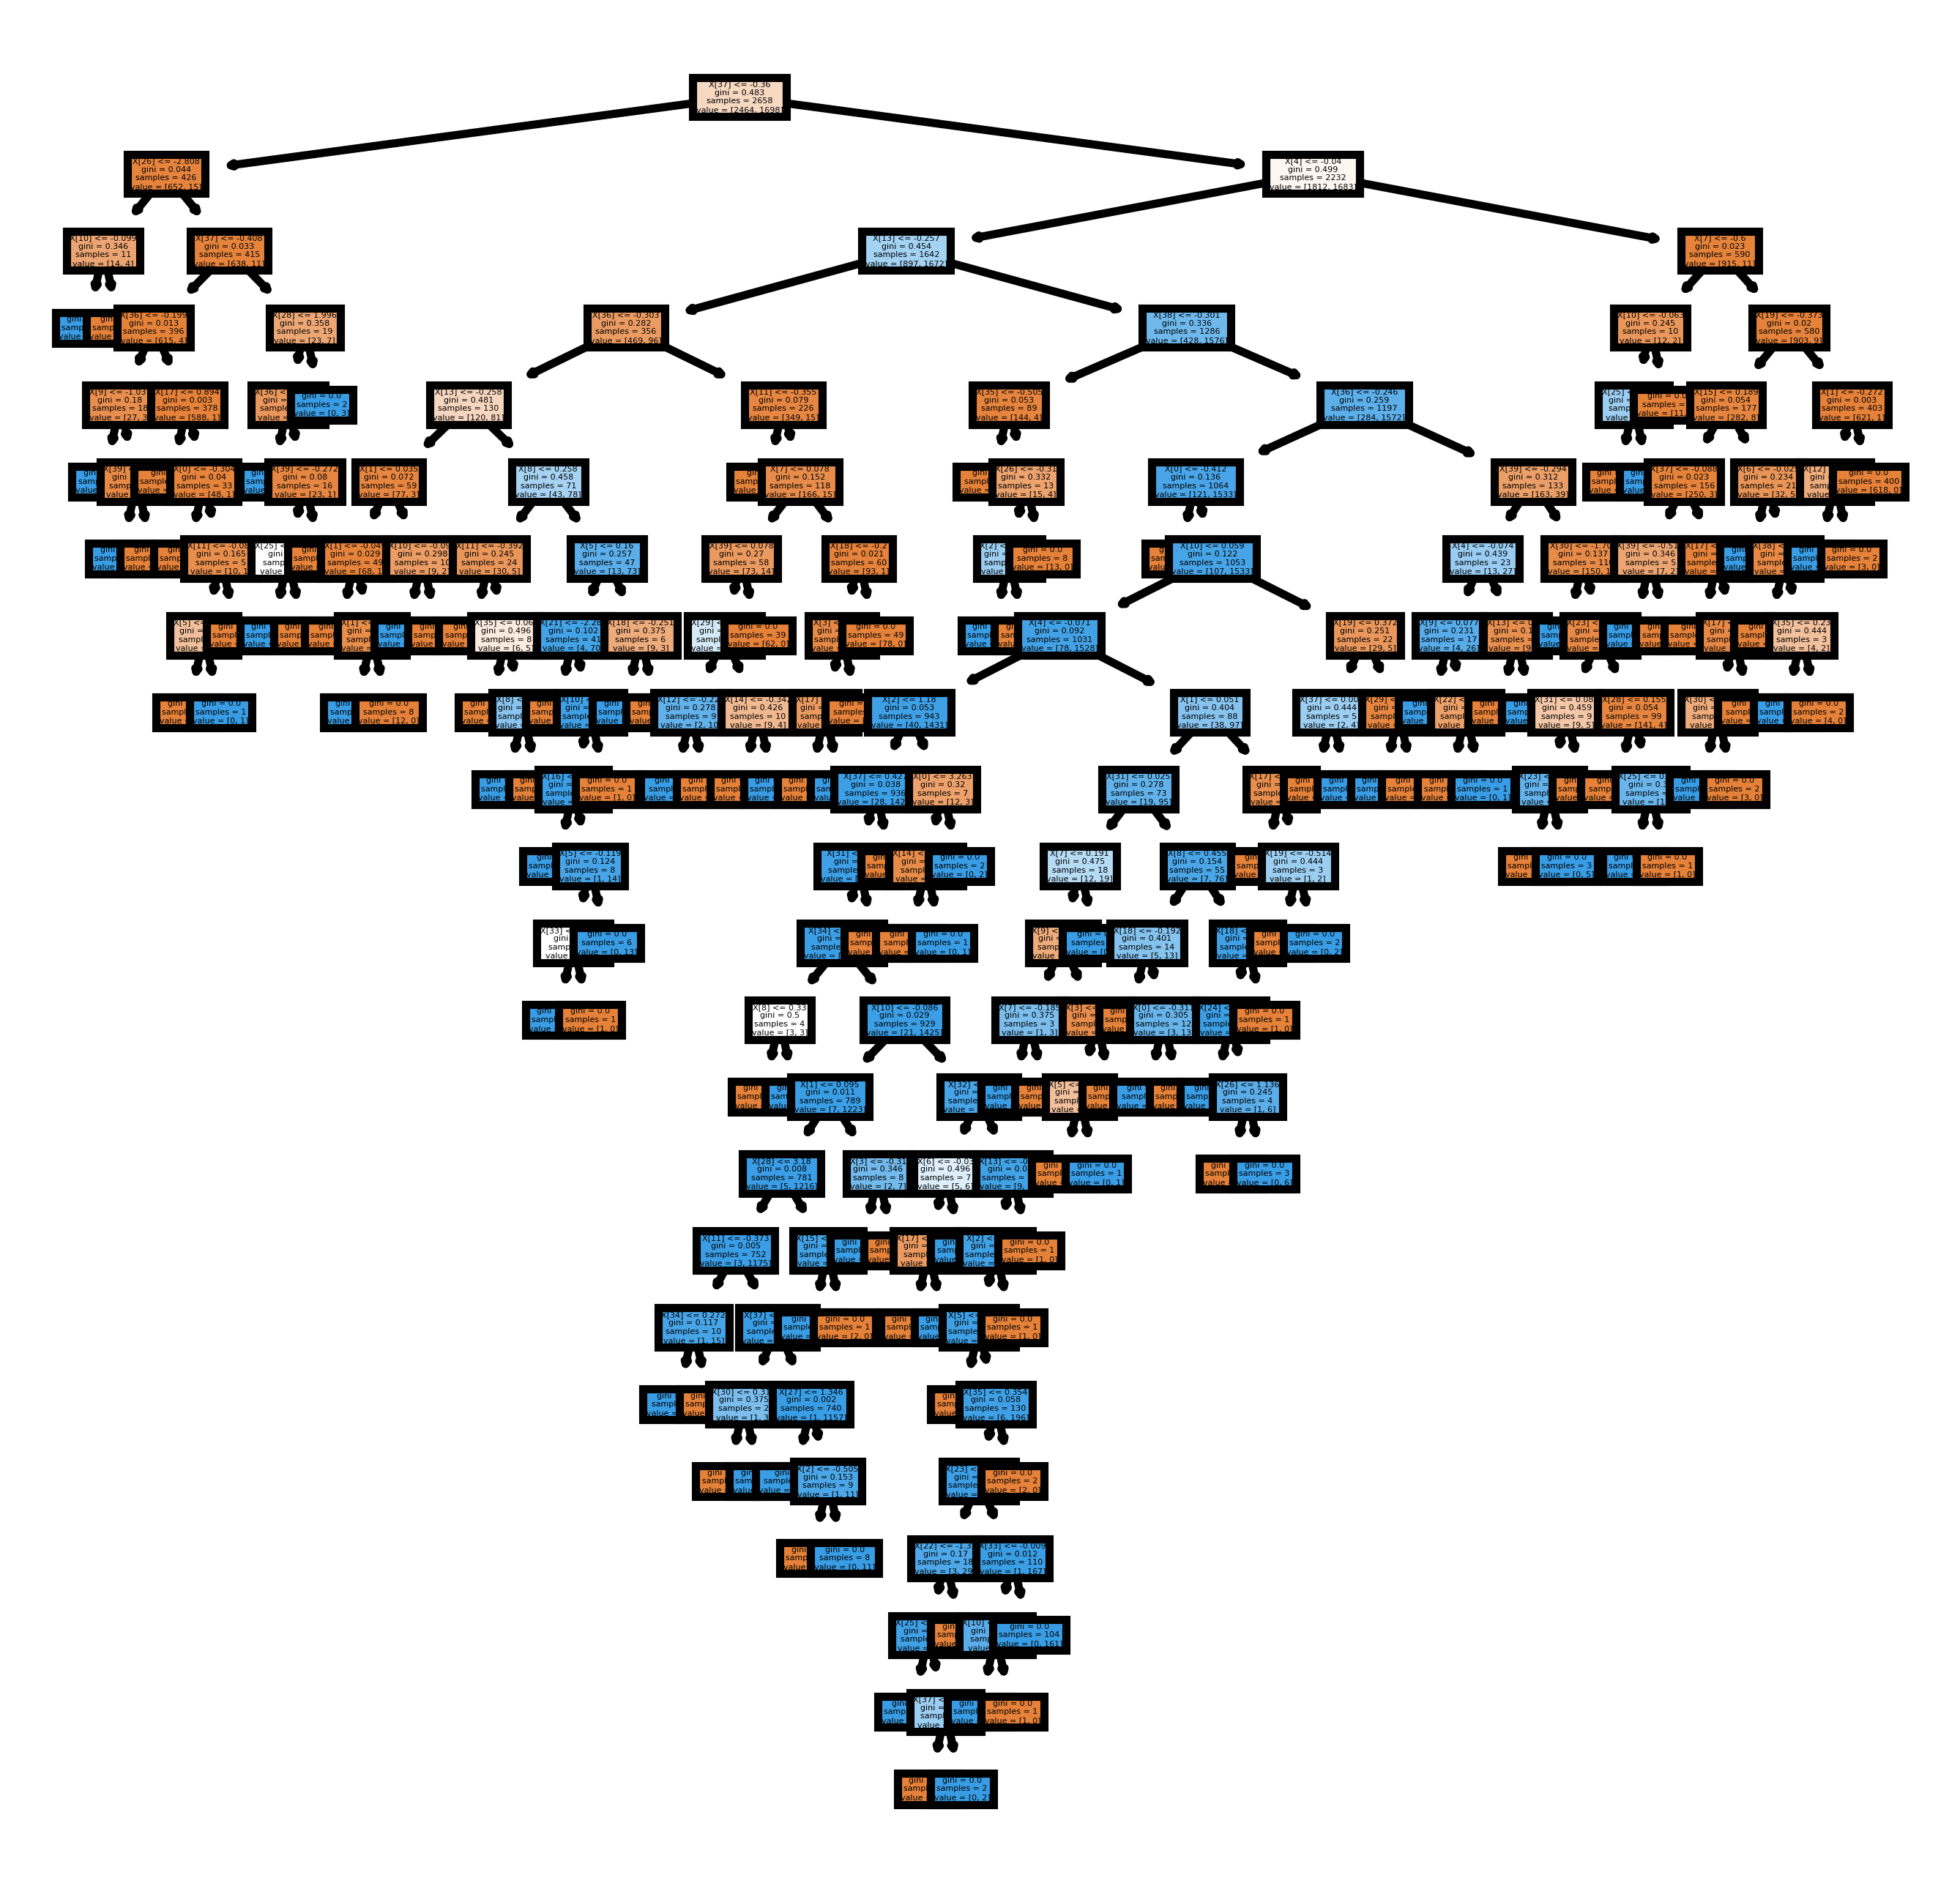

In [ ]:
#Plotando árvores individuais do Random Forest (estimator=3)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[3],
               filled = True);
fig.savefig('rf_individualtree.png')

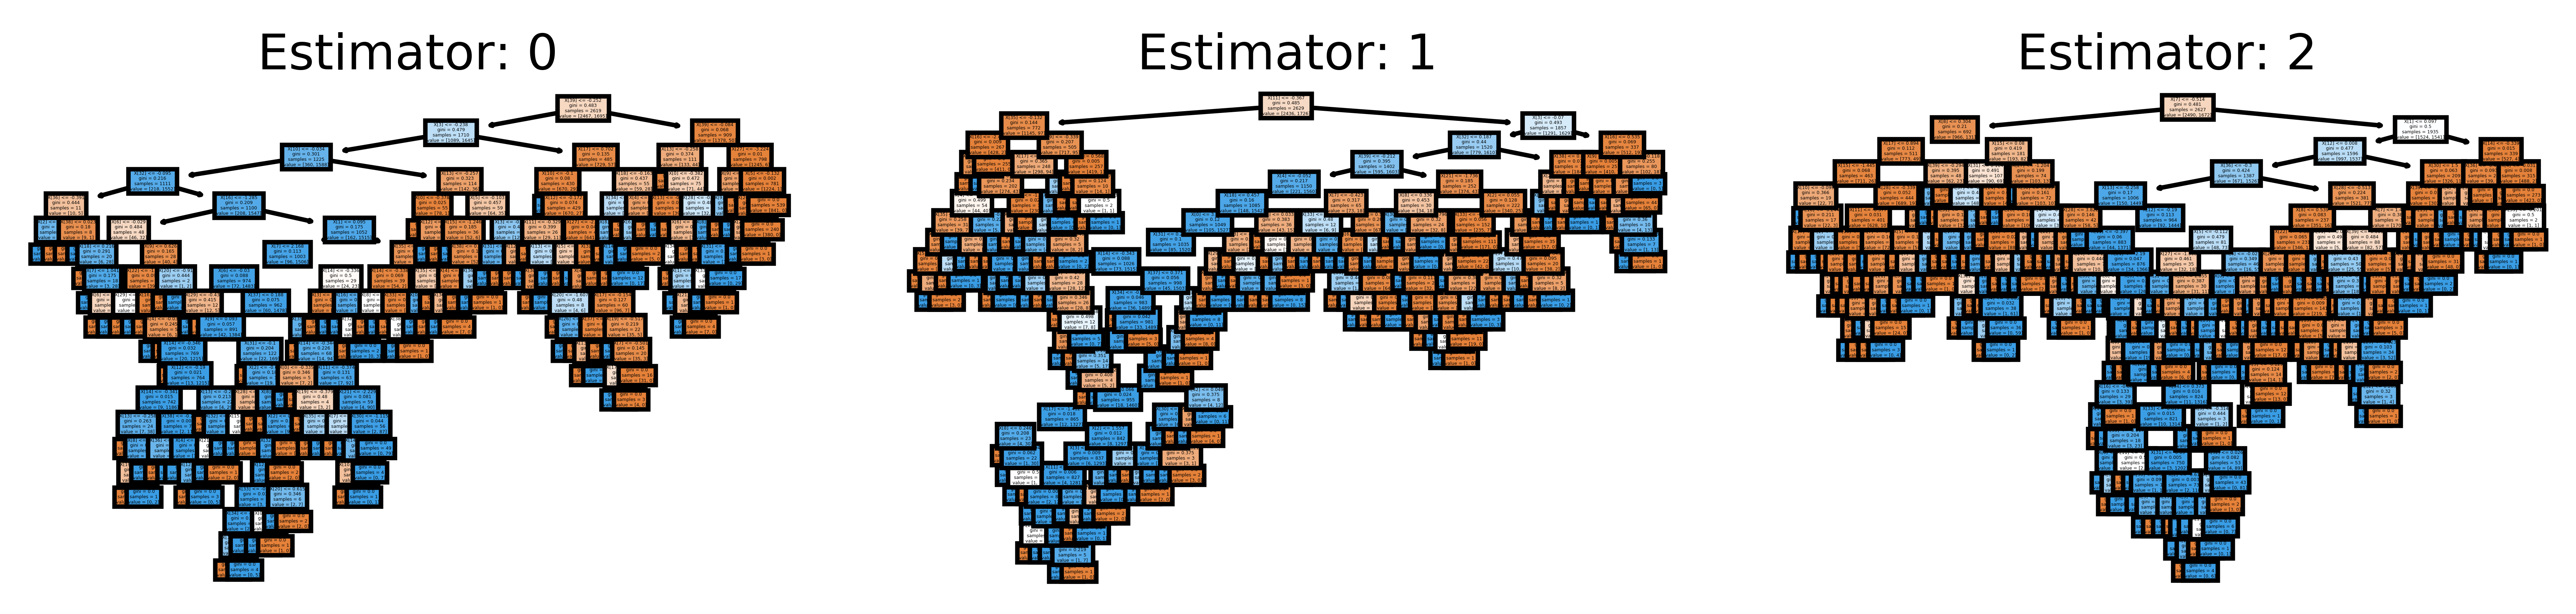

In [ ]:
#Plotando vários estimators do Random Forest 
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(rf.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_3trees.png')

### 12. Gradient Tree Boosting

O Gradient Tree Boosting constrói o modelo em etapas, permitindo a otimização de uma função de perda diferenciável  através de uma técnica chamada boosting. 
Nesta etapa foi usado o classificador GradientBoostingClassifier e foi variado o seu hiperparâmetro n_estimators, correspondente ao seu número de iterações. Foram realizadas iterações de número 10, 20 e 30. 
Abaixo, apresentam-se a criação do modelo e seus resultados:

In [ ]:
#Criando o modelo Gradient Tree Boosting
def gradient_tree_boosting(n_estimators):          
    gtb = ensemble.GradientBoostingClassifier(n_estimators = n_estimators)
    gtb = gtb.fit(X_train, Y_train)
    y_pred = gtb.predict(X_test)
       
    print("Relatório de classificação: \n", classification_report(Y_test, y_pred)) 

    return gtb   

In [ ]:
# Analisando o Gradient Tree Boosting com 10 números de iterações
gtb = gradient_tree_boosting(n_estimators = 10)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       625
           1       0.91      0.92      0.92       415

    accuracy                           0.93      1040
   macro avg       0.93      0.93      0.93      1040
weighted avg       0.93      0.93      0.93      1040



In [ ]:
# Analisando o Gradient Tree Boosting com 20 números de iterações
gtb = gradient_tree_boosting(n_estimators = 20)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       625
           1       0.93      0.94      0.93       415

    accuracy                           0.95      1040
   macro avg       0.94      0.95      0.94      1040
weighted avg       0.95      0.95      0.95      1040



In [ ]:
# Analisando o Gradient Tree Boosting com 30 números de iterações
gtb = gradient_tree_boosting(n_estimators = 30)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       625
           1       0.93      0.95      0.94       415

    accuracy                           0.95      1040
   macro avg       0.95      0.95      0.95      1040
weighted avg       0.95      0.95      0.95      1040



O Gradient Tree Boosting apresentou uma acurácia de 93%, 95% e 95% para as iterações 10, 20 e 30 respectivamente. Logo, o modelo obteve acurácias bem similares. Para o caso da precisão, o hiperparâmetro com 10 números de iteração apresentou menor precisão, enquanto os hiperparâmetros para 20 e 30 iterações foi similar, cerca de 97% para exoplanetas falso-positivos e 93%para confirmados. 
Pelo valor encontrado nas métricas podemos analisar que o Gradient Tree Boosting tem alta assertividade. 
Este modelo só não foi mais eficiente que o modelo Random Forest para as análises feitas. 

### 13. Comparação dos Modelos

A curva ROC (Receiver Operating Characteristic) e AUC são as métricas mais utilizadas para a avaliação de um modelo de Machine Learning. A curva ROC traça o True Positive Rate por False Positive Rate em diferentes classificações, serve para mostrar uma análise gráfica da sensibilidade e especificidade.  
A AUC (Area Under the ROC Curve) é que uma forma de resumir, definir a curva ROC em um único valor, agregando todos os limiares da ROC calculando a sua área sob a curva. Este valor varia de 0 a 1, e quanto maior a área melhor o valor.  
Essas métricas serão utilizadas para analisarmos todos os modelos, Naive Bayes, Decision Tree, k-Nearest Neighbors, Support Vector Machines, Random Forest e Gradient Tree Boosting, e definirmos qual o melhor modelo para nosso estudo de dados deste projeto. 

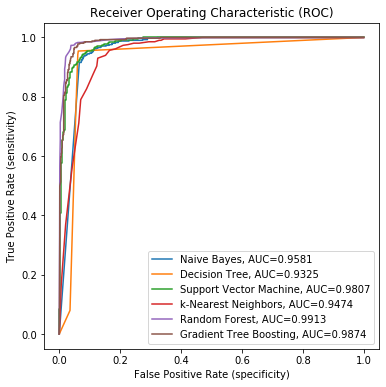

In [ ]:
#Plotando a curva ROC para todos os modelos para realizar a análise:

plt.figure(0).clf()
plt.rcParams['figure.figsize'] = (10,8)

plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlabel('False Positive Rate (specificity)')


#Curva ROC para o modelo Naive Bayes
y_pred = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_pred)
auc = round(roc_auc_score(Y_test, y_pred),4)
plt.plot(fpr,tpr,label='Naive Bayes, AUC='+str(auc))

#Curva ROC para o modelo Decision Tree
y_pred = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred)
auc = round(roc_auc_score(Y_test, y_pred),4)
plt.plot(fpr,tpr,label='Decision Tree, AUC='+str(auc))

#Curva ROC para o modelo Support Vector Machine  
y_pred = svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_pred)
auc = round(roc_auc_score(Y_test, y_pred),4)
plt.plot(fpr,tpr,label='Support Vector Machine, AUC='+str(auc))

#Curva ROC para o modelo k-Nearest Neighbors 
y_pred = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred)
auc = round(roc_auc_score(Y_test, y_pred),4)
plt.plot(fpr,tpr,label='k-Nearest Neighbors, AUC='+str(auc))

#Curva ROC para o modelo Random Forest
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred)
auc = round(roc_auc_score(Y_test, y_pred),4)
plt.plot(fpr,tpr,label='Random Forest, AUC='+str(auc))

#Curva ROC para o modelo Gradient Tree Boosting 
y_pred = gtb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred)
auc = round(roc_auc_score(Y_test, y_pred),4)
plt.plot(fpr,tpr,label='Gradient Tree Boosting, AUC='+str(auc))

plt.legend()
plt.show()

Os resultados obtidos pela AUC calculada pela curva ROC foram:
* Naive Bayes : 95.81%
* Decision Tree : 93.25%
* Support Vector Machines: 98.07%
* k-Nearest Neighbors: 94.74%
* Random Forest: 99.13% 
* Gradient Tree Boosting: 98.74%

Logo, os modelos mais precisos são Random Forest, Gradient Tree Boosting, Support Vector Machine, Naive Bayes, k-Nearest Neighbors e Decision Tree respectivamente para esse estudo. 

**Naive Bayes** 
Apresentou uma baixa precisão porém pela sua simplicidade apresentou resultados melhores que o k-Nearest Neighbors e o Decision Tree. 

**Decision Tree** 
Por ser um modelo mais simples sua precisão foi mais baixa que a de todos os demais modelos. 

**Support Vector Machine** 
Support Vector Machine apresentou um dos melhores resultados por ser um modelo mais complexo, ocupando a terceira posição. Apresentou ótima precisão ficando atrás apenas dos modelos Random Forest e Gradient Tree Boosting.

**k-Nearest Neighbors** 
O modelo k-Nearest Neighbors apresentou a segunda mais baixa precisão, ficando a frente apenas do Decision Tree. 

**Random Forest** 
O Random Forest foi o modelo mais preciso para o conjunto de dados deste projeto. Ele é um aprimoramento do Decision Tree onde ele utiliza diversas áreas. É um modelo mais complexo e apresentou os valores mais altos tanto de precisão como acurácia, comparado com todos os outros modelos.  

**Gradient Tree Boosting**
O Gradient Tree Boosting apresentou a segunda melhor precisão de acordo com as métricas. Isso se deve ao fato de ele ser um modelo que generaliza mais que os demais pelo fato de se basear no boosting.

### 14. Conclusão

Com o trabalho prático de Classificação de Exoplanetas foi praticado os conceitos aprendidos na disciplina Aprendizado de Máquina e analisados os principais métodos de classificação. 
Foram realizadas uma comparação entre seis métodos de classificação, Naive Bayes, Decision Tree, k-Nearest Neighbors, Support Vector Machines, Random Forest e Gradient Tree Boosting. 
A avaliação foi feita utilizando a acurácia, validação cruzada k-fold e classificação binária dos candidatos a exoplanetas.  

Neste trabalho foi realizado também variações de hiperparâmetros para analisar sua influência na classificação dos modelos.

Os valores encontrados mostraram a acurácia e precisão de cada modelo separadamente e a seguir todos foram comparados de forma conjunta utilizando as métricas da curva ROC e AUC. Os modelos mais precisos foram Random Forest, Gradient Tree Boosting, Support Vector Machine, Naive Bayes, k-Nearest Neighbors e Decision Tree respectivamente para esse projeto.